In [6]:
# load dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
X,y = mnist['data'], mnist['target']

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

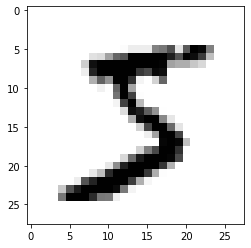

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.show()

In [12]:
y[0]

'5'

In [14]:
import numpy as np
y = y.astype(np.uint8)

we want to see few instances from the dataset . For this we need to plot of those instances. 

In [15]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation='nearest')
    plt.axis('off')

In [16]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    
    images_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    
    big_image = images_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
    
    plt.imshow(big_image, cmap=plt.cm.binary, **options)
    plt.axis('off')
    

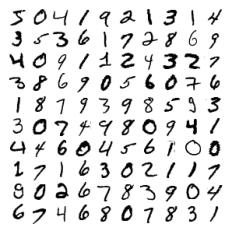

In [17]:

plt.figure(figsize=(8,4))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

In [18]:
y[0]

5

In [20]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

we have selected KNN classifier for this classification task. we need to find good hyperperameter values. we'll use #gridSearchCv for this task .

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = [{'weights':['uniform', 'distance'], 'n_neighbors':[3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  30.1s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  29.4s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  33.5s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  32.6s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  30.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  31.1s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  31.4s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  31.2s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  31.5s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  32.2s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  35.5s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [23]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [24]:
grid_search.best_score_

0.9716166666666666

In [25]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714